# Simulating OFDM



In [21]:
import matplotlib
matplotlib.rcParams.update({'font.size': 22})
import matplotlib.pyplot as plt
matplotlib.rcParams.update({'font.size': 22})
import numpy as np
import scipy 
from scipy.io import loadmat
from scipy.stats import norm
import sys
import yaml

sys.path.insert(0,"../")
from tools import *

In [22]:
# Parameters for the problem statement

# Frequency domain characteristics
f_s = 122.8e6               # sampling rate in SPS (symbols/second; symbol = complex number?)
num_subcarriers = 4096      # total number of subcarriers, including both the useful and not useful ones
scs = 30e3                  # subcarrier spacing in Hz
num_useful_sub = 3072       # total number of useful subcarriers along which data is transmitted


# Timing synchronization and channel estimation
preamble_length = 64               # length of the preamble sequence
path_preamble = "./preamble.mat"   # path to the file containing preamble to be used for timing synchronization
path_pilots = "./pilots.mat"       # path to the file containing pilots for channel estimation

# Time domain structure
num_ofdm_slot = 14          # number of ofdm symbols per slot
CP_one = 352                # CP of the first symbol
CP_n = 288                  # CP of the remaining 13 symbols


# Channel information       
k = 5                       # number of taps in the channel frequency response (discrete)


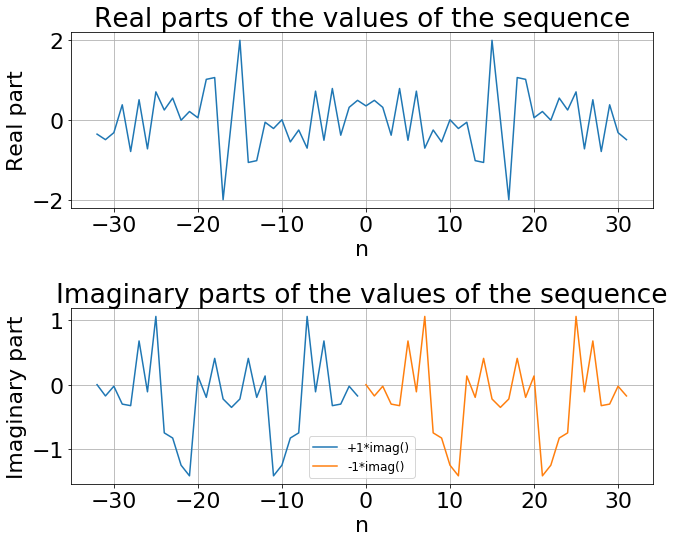

In [48]:
# loading the preamble sequence

preamble = loadmat(path_preamble)
preamble_sequence = np.squeeze(preamble["sequence_snc"])
length_preamble = len(preamble_sequence)
real = np.squeeze(preamble_sequence.real)
imaginary = np.squeeze(preamble_sequence.imag)

# visualizing symmetry of the preamble (given to be symmetric)
x_vals = np.arange(-length_preamble//2, length_preamble//2)
plt.figure(figsize = (10,8))
plt.subplot(211)
plt.title("Real parts of the values of the sequence")
plt.xlabel("n")
plt.ylabel("Real part")
plt.grid()
plt.plot(x_vals, real)

plt.subplot(212)
plt.title("Imaginary parts of the values of the sequence")
plt.xlabel("n")
plt.ylabel("Imaginary part")
plt.grid()
plt.plot(x_vals[:length_preamble//2], imaginary[:length_preamble//2], label = "+1*imag()")
plt.plot(x_vals[length_preamble//2:], -1*imaginary[length_preamble//2:], label = "-1*imag()") 
# negative because correlation is E(yy*) i.e conjugate?
plt.legend(fontsize = 12)

plt.tight_layout()
plt.show()

In [2]:
# def functions for 



# defining a few necessary functions

def simulate_QAM_generic():
    """Function to simulate generation, transmission and receiving of QAM symbols, generic channel
    """
    
    pass

def construct_Pmatrix(P,)

def visualise_QAM(M, mapping):
    """Function to plot the constellation
    
    Calling this function results in a plot of the desired consteallation
    
    Args:
        M (int): number of constellation points in the M-QAM
        mapping (list): mapping of symbols to a coordinate 
            system
        
    """
    
    plt.figure(figsize = (10,8))
    plt.title(str(M) + "-QAM")
    plt.xlabel("$\phi_1$")
    plt.ylabel("$\phi_2$")
    plt.grid()
    plt.scatter(mapping[:,0], mapping[:,1])
    plt.axhline(linewidth=2, color='k')
    plt.axvline(linewidth=2, color='k')
    plt.show()
    plt.close()

In [4]:
# defining the channel and parameters of transmission

P = np.array([0.9, 1])
delta = 2
N_f = 3
v = 1 
E = 1